In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
test_string = test["PassengerId"]

In [3]:
# Preprocess data: string => int

mappings = {}
for col in train.columns:
    unique_values = train[col].unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    mappings[col] = mapping

# Step 3: Replace the original string values with these integers
for col, mapping in mappings.items():
    train[col] = train[col].map(mapping)



In [4]:
y = train["Transported"]
X = train.drop(["Transported"],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Preprocess Data test csv 

mappings = {}
for col in test.columns:
    unique_values = test[col].unique()
    mapping = {val: idx for idx, val in enumerate(unique_values)}
    mappings[col] = mapping

# Step 3: Replace the original string values with these integers
for col, mapping in mappings.items():
    test[col] = test[col].map(mapping)

print(test)
print(test_string)

      PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  \
0               0           0          0      0            0    0    0   
1               1           0          1      1            0    1    0   
2               2           1          0      2            1    2    0   
3               3           1          1      3            0    3    0   
4               4           0          1      4            0    4    0   
...           ...         ...        ...    ...          ...  ...  ...   
4272         4272           0          0   3262            0   25    0   
4273         4273           0          1     15            0   39    0   
4274         4274           2          0   3263            1   22    0   
4275         4275           1          1   3264            3   22    0   
4276         4276           0          0   3265            2   52    0   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  
0               0          0             0    0

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(test)

C:\Users\dangm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
submission = pd.DataFrame({
    'PassengerId': test_string,
    'Transported': y_pred
})
# Save the submission file
submission.to_csv('submission.csv', index=False)

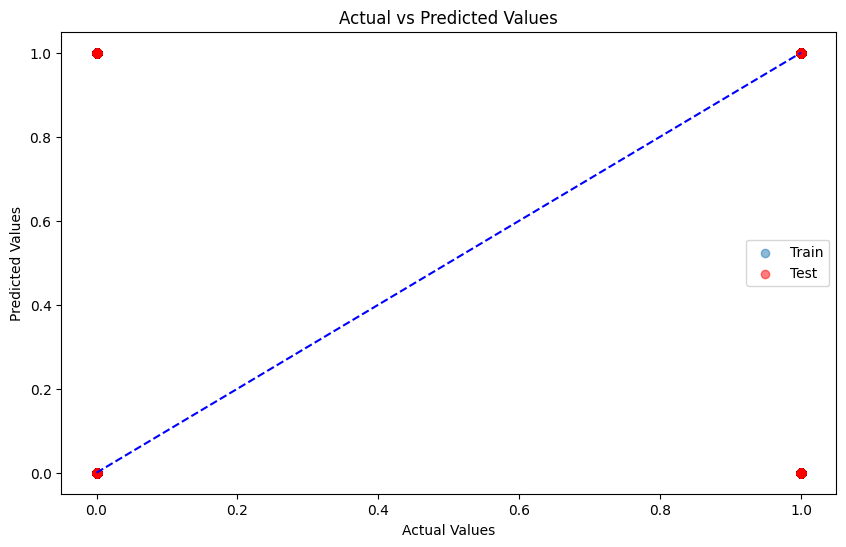

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, model.predict(X_train), alpha=0.5, label='Train')
plt.scatter(y_test, model.predict(X_test), alpha=0.5, color='red', label='Test')
plt.plot([min(y), max(y)], [min(y), max(y)], color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

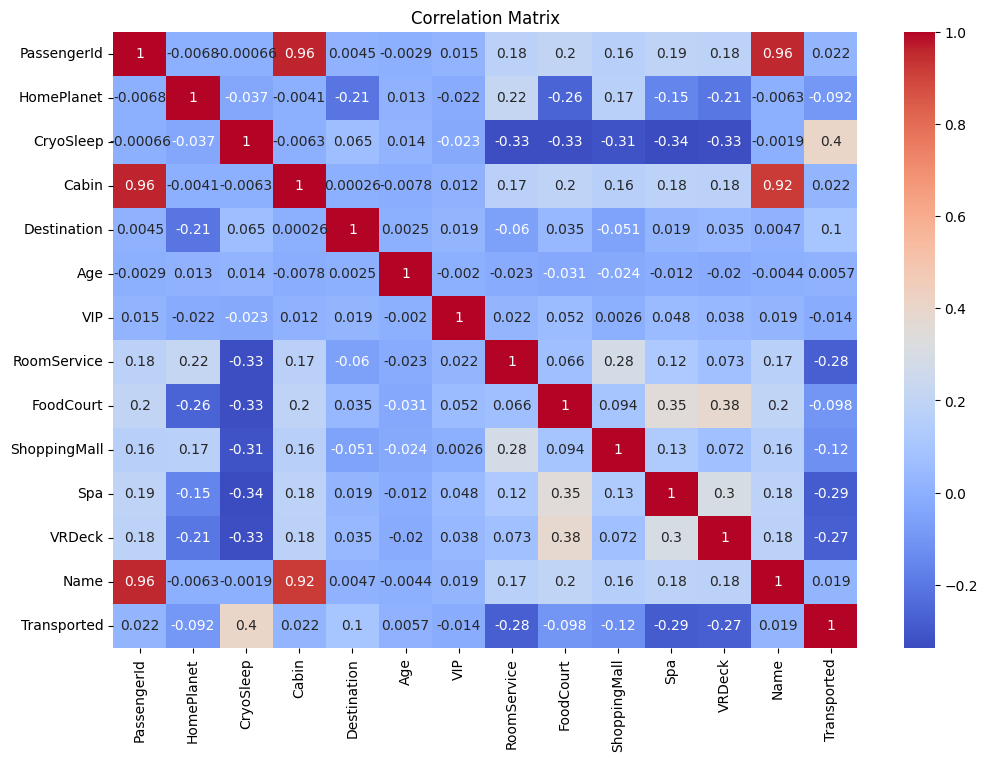

C:\Users\dangm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dangm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dangm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dangm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

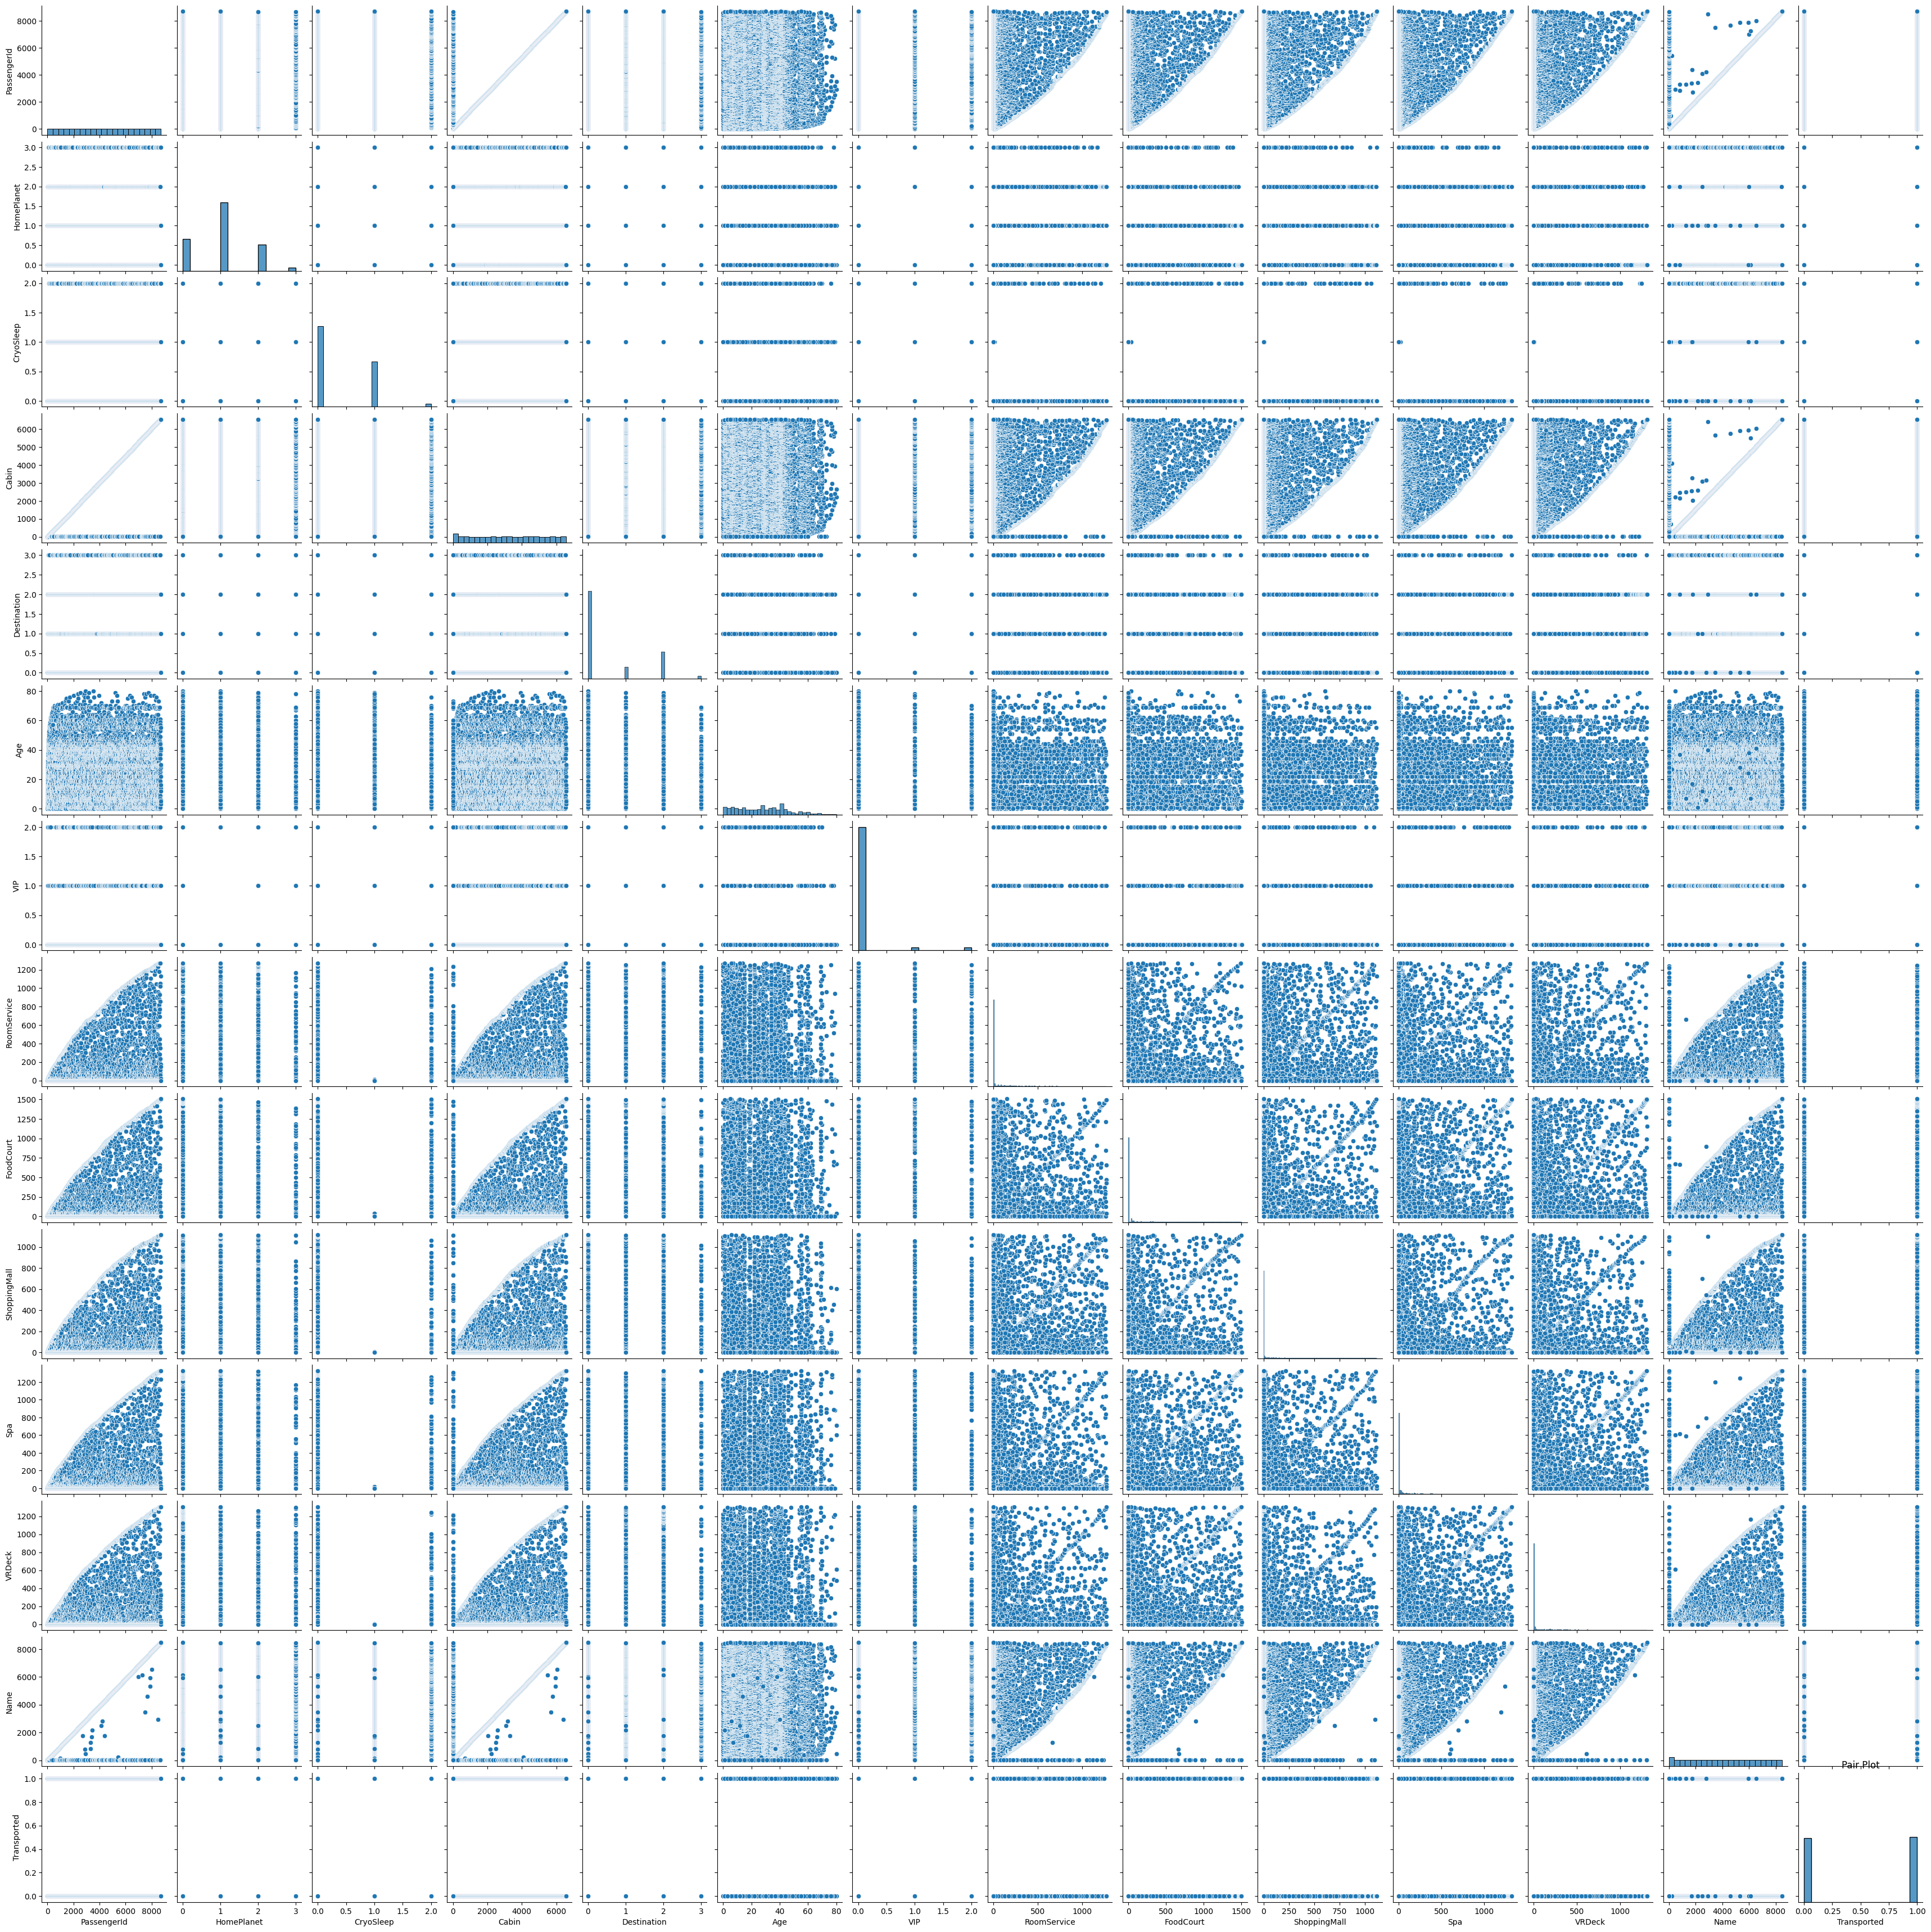

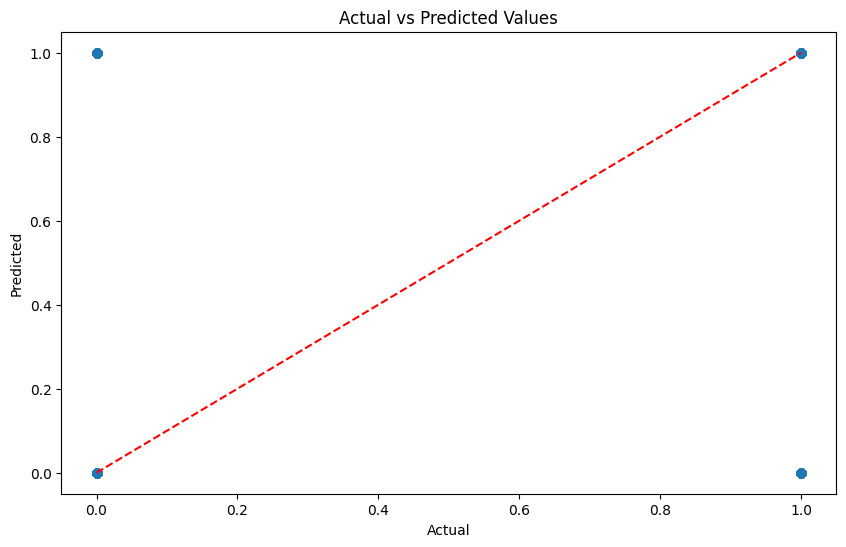

NameError: name 'confusion_matrix' is not defined

In [23]:
import seaborn as sns
# Visualize the data
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(train)
plt.title('Pair Plot')
plt.show()

# Scatter plot of actual vs predicted values
y_test_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_test_pred))